# Trained DQN test

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras

import seaborn as sns

# 화면 스타일 설정하기

sns.set_style("whitegrid")
sns.set_context('notebook')
plt.rc('font', size=25)
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *
import numpy as np

## graph

In [2]:
result_data = '0220/log_last0220.csv'
dqn_data = '0211/log_last0211.csv'
avg_delay = '0220/avg_delay_last0220.csv'
spq = '0306/log_last0306.csv'
epsilon_max = 1 

In [3]:
#the result data frame has [episode_num, duration, final step, score, epsilon, a minimum of average loss]
df = pd.read_csv(result_data).drop('Unnamed: 0',axis=1)
df_dqn = pd.read_csv(dqn_data).drop('Unnamed: 0',axis = 1)
df_spq = pd.read_csv(spq).drop('Unnamed: 0',axis=1)
epsilon_ = df['Epsilon'] < epsilon_max
df = df[epsilon_].reset_index(drop=True,inplace=False)
#df

max_ = 31.4
max__ = 35.4 
min_ = 0
mm = max_ - min_
mmm = max__ - min_

sc = list(df['Score'])
scp = list(df_spq['Score'])
scd = list(df_dqn['Score'])
sc_ = list(map(lambda x : (x - min_)/mmm, sc))
scp_ = list(map(lambda x: (x-min_)/mm, scp))
scd_ = list(map(lambda x: (x-min_)/mm, scd))

df_spq.insert(0,'normalized score', scp_)
df_dqn.insert(0,'normalized score', scd_)
df.insert(0,'normalized score', sc_)

In [4]:
df

,normalized score,Episode,Duration,Slots,Score,Epsilon,min_loss,p1,p2
0,0.480226,1,0.1182,197,17.00,0.999800,28.775219,11,90
1,0.477401,2,0.1086,181,16.90,0.999600,95.670486,10,95
2,0.542373,3,0.1200,200,19.20,0.999400,78.540054,15,88
3,0.483051,4,0.1242,207,17.10,0.999200,81.881493,13,79
4,0.483051,5,0.1254,209,17.10,0.999000,80.436707,12,85
...,...,...,...,...,...,...,...,...,...
19994,0.940395,19995,0.1980,330,33.29,0.018327,0.001823,40,79
19995,0.960452,19996,0.1824,304,34.00,0.018323,0.001658,40,86
19996,0.968927,19997,0.1062,177,34.30,0.018319,0.001659,40,89
19997,0.937571,19998,0.1980,330,33.19,0.018316,0.001717,40,78


## delay graph

In [2]:
qdelay_ddqn = 'test/delay.csv'
qdelay_sp = 'test/SP/delay.csv'
et_ddqn = 'test/et.csv'
et_sp = 'test/SP/et.csv'

qdelay_ddqn_ = pd.read_csv(qdelay_ddqn).drop('Unnamed: 0',axis=1)
qdelay_sp_ = pd.read_csv(qdelay_sp).drop('Unnamed: 0',axis=1)
et_ddqn_ = pd.read_csv(et_ddqn).drop('Unnamed: 0',axis=1)
et_sp_ = pd.read_csv(et_sp).drop('Unnamed: 0',axis=1)

q_d_1 = qdelay_ddqn_[qdelay_ddqn_['0'] == 0]
q_d_2 = qdelay_ddqn_[qdelay_ddqn_['0'] == 1]
e_d_1 = et_ddqn_[et_ddqn_['0'] == 0]
e_d_2 = et_ddqn_[et_ddqn_['0'] == 1]

q_s_1 = qdelay_sp_[qdelay_sp_['0'] == 0]
q_s_2 = qdelay_sp_[qdelay_sp_['0'] == 1]
e_s_1 = et_sp_[et_sp_['0'] == 0]
e_s_2 = et_sp_[et_sp_['0'] == 1]

KeyError: '0'

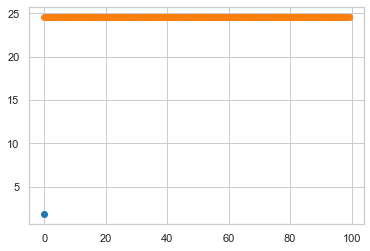

In [15]:
#delay
# plt.ylim((0,12.5))
Y1 = q_d_1['1']
Y2 = e_d_1['1']
Y3 = q_s_1['1']
Y4 = e_s_1['1']

Y5 = q_d_2['1']
Y6 = e_d_2['1']
Y7 = q_s_2['1']
Y8 = e_s_2['1']

# plt.scatter(range(40),Y1*1000, label='qd_d1')
# plt.plot(range(40),Y2*1000, label='et_d1')

# plt.scatter(range(40),Y3*1000, label='qd_d1')
# plt.plot(range(40),Y4*1000, label='et_d1')

plt.scatter(range(100),Y5*1000, label='qd_d1')
# plt.plot(range(100),Y6*1000, label='et_d1')

plt.scatter(range(100),Y7*1000, label='qd_d1')
# plt.plot(range(100),Y8*1000, label='et_d1')

# plt.plot(range(20000),[5 for _ in range(20000)], c ='orange', label = 'deadline')
# plt.xlabel('number of episode')
#cb=plt.colorbar(label = 'priority')
#cb.set_ticks([0,1])
# plt.ylabel('average End to End packet delay(ms)')
# plt.legend(loc='upper left')

In [9]:
ddd1 = 'test/delay1.csv'
ddd2 = 'test/delay2.csv'
sd1 = 'test/SP/delay1.csv'
sd2 = 'test/SP/delay2.csv'

ddd1_ = pd.read_csv(ddd1)
ddd2_ = pd.read_csv(ddd2)
sd1_ = pd.read_csv(sd1)
sd2_ = pd.read_csv(sd2)

In [10]:
z1 = ddd1_.iloc[:,1:]
z2 = sd1_.iloc[:,1:]
z3 = ddd2_.iloc[:,1:]
z4 = sd2_.iloc[:,1:]
z1_ = list(z1.sum(axis = 1))
z2_ = list(z2.sum(axis = 1))
z3_ = list(z3.sum(axis = 1))
z4_ = list(z4.sum(axis = 1))

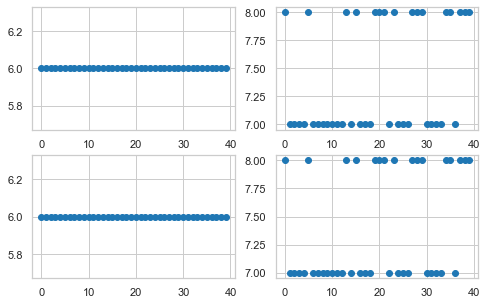

In [11]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(2,2)
f.set_size_inches((8,5))

axes[0][0].scatter(range(len(z1_)), z1_)
axes[1][0].scatter(range(len(z2_)),z2_)
axes[0][1].scatter(range(len(z3_)),z3_)
axes[1][1].scatter(range(len(z4_)),z4_)

plt.show()

----

In [6]:
x=range(int(len(df['Episode'])))
y=df['Epsilon']
y2=df['Score']
y3=df['min_loss']
y4=df['p1']
y5=df['p2']

#delay
y8=df_['p1_q']
y9=df_['p2_q']
y10=df_['p1_e']
y11=df_['p2_e']

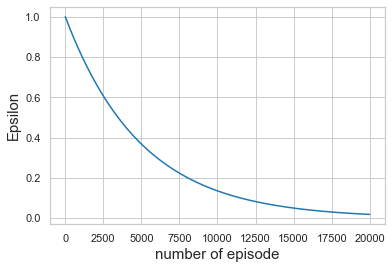

In [7]:
plt.plot(x,y)
plt.xlabel('number of episode', fontsize=15)
plt.ylabel('Epsilon',fontsize=15)
plt.savefig('Epsilon.png',dpi = 500)

Text(0, 0.5, 'Score')

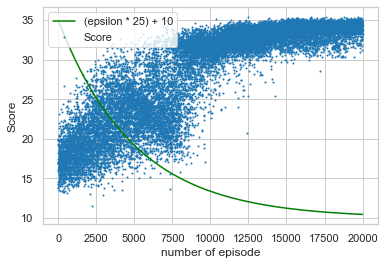

In [8]:
plt.scatter(x,y2, s=1, label='Score')
plt.plot(x,y*25+10, c='g', label = '(epsilon * 25) + 10')
plt.legend(loc='upper left')
plt.xlabel('number of episode')
plt.ylabel('Score')

(10.0, 37.0)

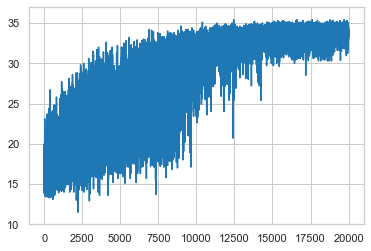

In [9]:
plt.plot(x,y2, label='sum of reward')
plt.ylim((10,37))

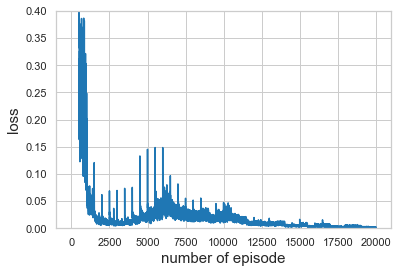

In [10]:
plt.ylim((0,0.4))
plt.plot(x,y3)
#plt.plot(x,y)
plt.xlabel('number of episode',fontsize = 15)
plt.ylabel('loss',fontsize = 15)
plt.savefig('lossddqn.png',dpi=500)

Text(0, 0.5, 'loss')

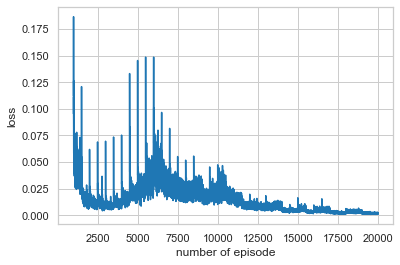

In [11]:
# plt.ylim((0,0.4))
plt.plot(x[1000:],y3[1000:])
#plt.plot(x,y)
plt.xlabel('number of episode')
plt.ylabel('loss')

## 이동평균, fill between

In [12]:
ws = 1000
score = df['normalized score']
roll_mean=list(score.rolling(window=ws).mean())
roll_ = roll_mean[ws:]
X = range(len(roll_))

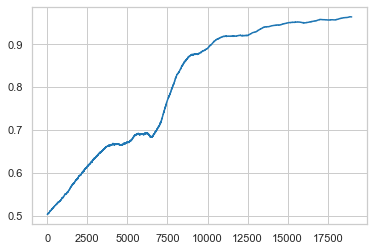

In [13]:
plt.plot(X,roll_)

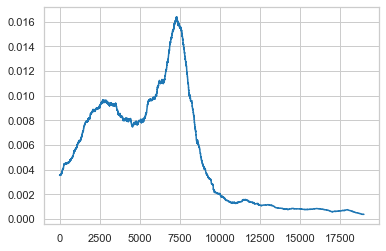

In [14]:
roll_var = list(score.rolling(window=ws).var())
roll_std = list(score.rolling(window=ws).std())
roll_var = roll_var[ws:]
roll_std = roll_std[ws:]
plt.plot(X,roll_var)

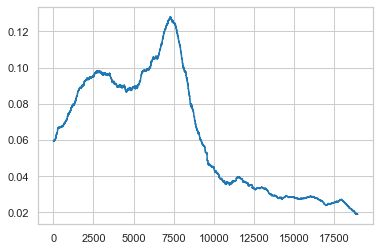

In [15]:
plt.plot(X,roll_std)

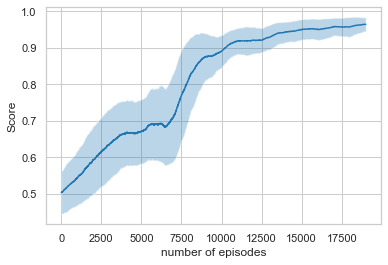

In [16]:
plt.plot(X, roll_)
plt.xlabel('number of episodes')
plt.ylabel('Score')
error1 = np.array(roll_) + np.array(roll_std)
error2 = np.array(roll_) - np.array(roll_std)
plt.fill_between(X, error1, error2, alpha = .3)

# result analysis

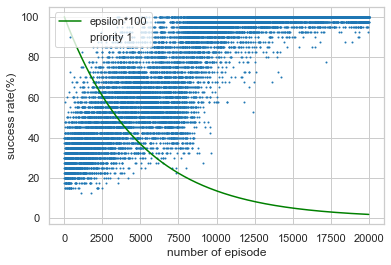

In [17]:
#success rate 
plt.scatter(x,y4/40 * 100,  s=1,  label='priority 1')
#plt.scatter(x,y5/100 * 100, s=1, label='priority 2')
plt.plot(x,y*100, c='g', label = 'epsilon*100')

plt.xlabel('number of episode')
plt.ylabel('success rate(%)')
plt.legend(loc='upper left')

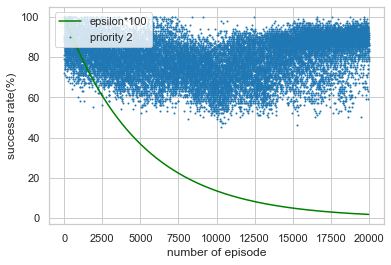

In [18]:
#success rate 
#plt.scatter(x,y4/40 * 100,  s=1,  label='priority 1')
plt.scatter(x,y5/100 * 100, s=1, label='priority 2')
plt.plot(x,y*100, c='g', label = 'epsilon*100')

plt.xlabel('number of episode')
plt.ylabel('success rate(%)')
plt.legend(loc='upper left')

In [19]:
len(x)

19999

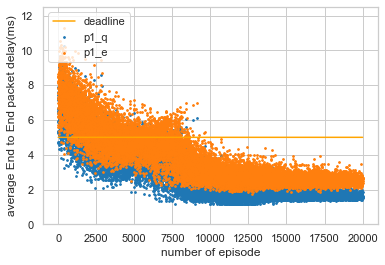

In [20]:
#delay
plt.ylim((0,12.5))
plt.scatter(range(100),y8*1000,  s=3,  label='p1_q')
plt.scatter(range(100),y10*1000,  s=3,  label='p1_e')

plt.plot(range(20000),[5 for _ in range(20000)], c ='orange', label = 'deadline')
plt.xlabel('number of episode')
#cb=plt.colorbar(label = 'priority')
#cb.set_ticks([0,1])
plt.ylabel('average End to End packet delay(ms)')
plt.legend(loc='upper left')

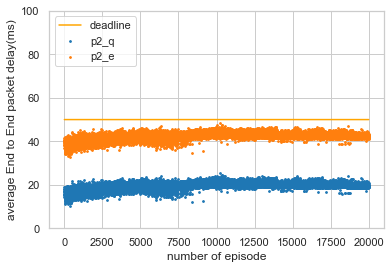

In [21]:
#delay
plt.ylim((0,100))

plt.scatter(range(20000),y9*1000,  s=3,  label='p2_q')
plt.scatter(range(20000),y11*1000,  s=3,  label='p2_e')

plt.plot(range(20000),[50 for _ in range(20000)], c ='orange', label = 'deadline')
plt.xlabel('number of episode')
#cb=plt.colorbar(label = 'priority')
#cb.set_ticks([0,1])
plt.ylabel('average End to End packet delay(ms)')
plt.legend(loc='upper left')

## DQN과 비교

In [22]:
x_=range(int(len(df_dqn['Episode'])))
y_=df_dqn['Epsilon']
y2_=df_dqn['normalized score']
y3_=df_dqn['min_loss']
xx = range(int(len(df_spq['Episode'])))
yy = df_spq['normalized score']
# y4=df['p1']
# y5=df['p2']

Text(0, 0.5, 'Score')

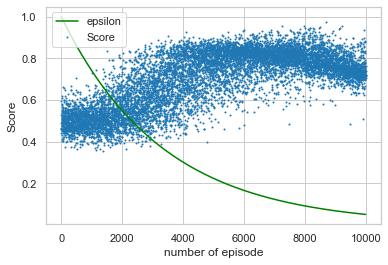

In [23]:
plt.scatter(x_,y2_, s=1, label='Score')
plt.plot(x_,y_, c='g', label = 'epsilon')
plt.legend(loc='upper left')
plt.xlabel('number of episode')
plt.ylabel('Score')

# loss

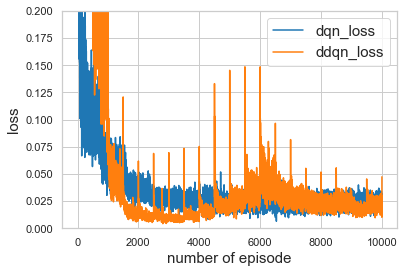

In [24]:
#plt.style.use(['classic'])

plt.ylim((0,0.2))
plt.plot(x_,y3_, label = 'dqn_loss')
plt.plot(x_,y3[:10000], label = 'ddqn_loss' )

plt.xlabel('number of episode', fontsize = 15)
plt.ylabel('loss', fontsize = 15)

plt.legend(loc='upper right', fontsize=15)


plt.savefig('lossdqnddqn.png',dpi=500)

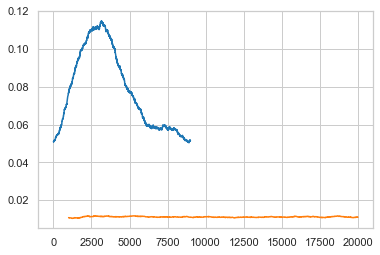

In [25]:
#wsd = 10
score_dqn = df_dqn['normalized score']
dqn_mean=list(score_dqn.rolling(window=ws).mean())
dqn_ = dqn_mean[ws:]
X_ = range(len(dqn_))
dqn_var = list(score_dqn.rolling(window=ws).var())
dqn_std = list(score_dqn.rolling(window=ws).std())
dqn_var = dqn_var[ws:]
dqn_std = dqn_std[ws:]
plt.plot(X_,dqn_std)

score_spq = df_spq['normalized score']
spq_mean = list(score_spq.rolling(window=ws).mean())
spq_ = spq_mean[ws:]
Xx = range(len(spq_))
spq_std = list(score_spq.rolling(window=ws).std())
plt.plot(xx,spq_std)

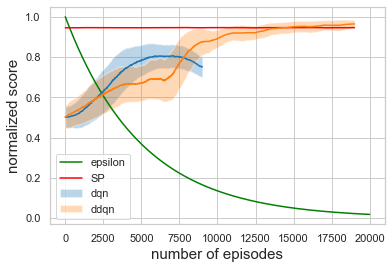

In [26]:
plt.plot(x,y, c='g', label = 'epsilon')
plt.plot(X_, dqn_)
plt.plot(Xx,spq_, c='r', label = 'SP')
plt.xlabel('number of episodes', fontsize =15)
plt.ylabel('normalized score', fontsize = 15)
error1_ = np.array(dqn_) + np.array(dqn_std)
error2_ = np.array(dqn_) - np.array(dqn_std)
plt.plot(X, roll_)
plt.fill_between(X_, error1_, error2_, alpha = .3,label = 'dqn')
plt.fill_between(X, error1, error2, alpha = .3,label='ddqn')
plt.legend(loc='lower left')
plt.savefig('score.png',dpi=500)

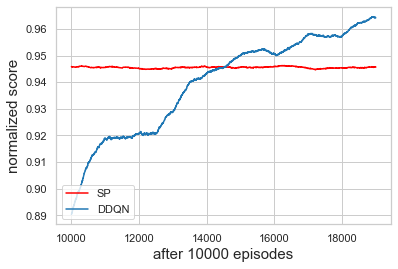

In [27]:
#plt.plot(x,y, c='g', label = 'epsilon')
#plt.plot(X_, dqn_)
plt.plot(Xx[10000:],spq_[10000:], c='r', label = 'SP')
plt.xlabel('after 10000 episodes', fontsize =15)
plt.ylabel('normalized score', fontsize = 15)
# error1_ = np.array(dqn_) + np.array(dqn_std)
# error2_ = np.array(dqn_) - np.array(dqn_std)
plt.plot(X[10000:], roll_[10000:], label = 'DDQN')
# plt.fill_between(X_, error1_, error2_, alpha = .3,label = 'dqn')
# plt.fill_between(X, error1, error2, alpha = .3,label='ddqn')
plt.legend(loc='lower left')
plt.savefig('score_zoomin.png',dpi=500)

---------

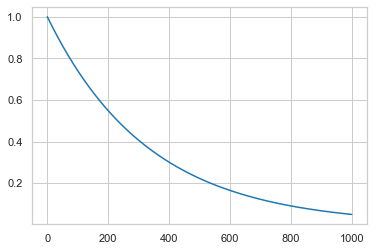

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,1000)
y = 1*(0.997**x)
plt.plot(x,y)
plt.show()

## model test

In [29]:
from tensorflow.keras.utils import plot_model

In [30]:
md=keras.models.load_model("[19999]0.004812348634004593_last.h5")
md.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


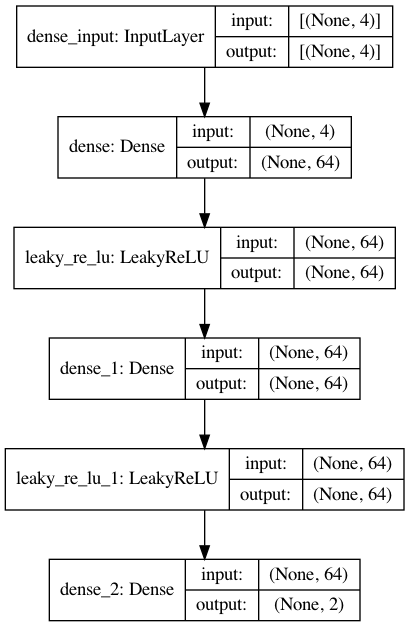

In [31]:

plot_model(md, to_file='model.png',show_shapes=True)

------

## box plot

In [4]:

ge = 'test(0220)_15963_best0.6/extract.csv'
gf = 'test(0220)_15963_best0.6/fifo.csv'
#ga = 'test/apply.csv'

ge = pd.read_csv(ge).drop('Unnamed: 0',axis=1)
gf = pd.read_csv(gf).drop('Unnamed: 0',axis=1)
#ga = pd.read_csv(ga).drop('Unnamed: 0',axis=1)


In [5]:
print(np.mean(ge['Score']))
#print(np.mean(ga['Score']))
print(np.mean(gf['Score']))

34.67999999999999
33.489999999999995


In [6]:
ge_=list(ge['Score'])
#ga_=list(ga['Score'])
gf_=list(gf['Score'])
score_list = ge_+gf_
# max_ = np.max(score_list)
# min_ = np.min(score_list)
max_ = 35.4
min_ = 0
mm = max_ - min_
ge__ = list(map(lambda x : (x - min_)/mm, ge_))
gf__ = list(map(lambda x : (x - min_)/mm, gf_))
#ga__ = list(map(lambda x : (x - min_)/mm, ga_))
gf.insert(0,'normalized score', gf__)
gf.insert(0,'scheduler', 'SP')
ge.insert(0,'normalized score', ge__)
ge.insert(0,'scheduler', 'DDQN')
#ga.insert(0,'norm_score', ga__)
#ga.insert(0,'type', 'gcl_apply')

In [7]:
data = pd.concat([gf,ge])

In [8]:
data

,scheduler,normalized score,Slots,Score,p1,p2
0,SP,0.940678,141,33.30,40,79
1,SP,0.937853,141,33.20,40,78
2,SP,0.929379,141,32.90,40,75
3,SP,0.957627,141,33.90,40,85
4,SP,0.946328,141,33.50,40,81
5,SP,0.957627,141,33.90,40,85
6,SP,0.946328,141,33.50,40,81
7,SP,0.951977,141,33.70,40,83
8,SP,0.940678,141,33.30,40,79
9,SP,0.951977,141,33.70,40,83


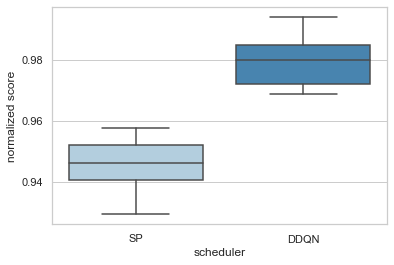

In [9]:
sns.boxplot(x = "scheduler", y = "normalized score", data = data , palette = "Blues")
sns.set(font_scale= 1.5)
plt.savefig('botplot.png', dpi=500) 

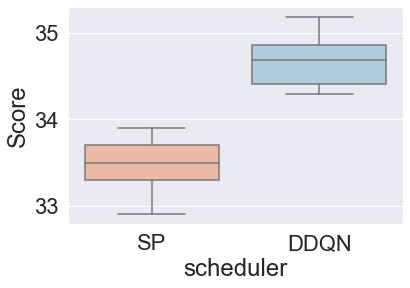

In [48]:
sns.boxplot(x = "scheduler", y = "Score", data = data, palette = "RdBu")

plt.savefig('boxplot_norm3.png',dpi=300) 

-----------

In [25]:
import warnings
warnings.filterwarnings(action='ignore') 

cc_act = action_list[np.argmax(cc.predict(state1))]
ad_act = action_list[np.argmax(ad.predict(state2))]
vd_act = action_list[np.argmax(ad.predict(state3))]
be_act = action_list[np.argmax(ad.predict(state4))]
# a = format(np.argmax(cc.predict(state1)),'0'+str(10)+'b')
# b = format(np.argmax(ad.predict(state2)),'0'+str(10)+'b')
# c = format(np.argmax(vd.predict(state3)),'0'+str(10)+'b')
# d = format(np.argmax(be.predict(state4)),'0'+str(10)+'b')
print(cc_act)
print(ad_act)
print(vd_act)
print(be_act)

NameError: name 'action_list' is not defined

In [ ]:
gcl = [cc_act,ad_act,vd_act,be_act]
a = np.array([list(map(int,g)) for g in gcl])

In [ ]:
a[:,2]

In [ ]:
#state=np.array([0,0,0,100]).reshape(-1,4)
state1 = np.array([1,1]).reshape(1,2)
state2 = np.array([0.3,0.3]).reshape(1,2)
state3 = np.array([0.9,0.9]).reshape(1,2)
state4 = np.array([0.9,0.9]).reshape(1,2)

In [ ]:
sim = pd.read_csv('switchlog0818_generated.csv')
sim = sim.drop('Unnamed: 0',axis=1)
generated_time=list(sim['time'])
generated_time=list(map(float,generated_time))
A=sim.loc[:,['Unnamed: 6']].values.tolist()
A_=list(map(str,A))
A_[3]
B = [float(a[14:33]) for a in A_]
c=[B[i]-generated_time[i] for i in range(len(B))]
sim.loc[:,'delay']=c

In [ ]:
sim

In [ ]:
one = sim['class']==1
one = sim[one]
two = sim['class'] ==2
two = sim[two]
th = sim['class'] ==3
th = sim[th]

In [ ]:
one

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame
from pandas import Series

#plt.subplot(311)
# plt.ylim(-0.1,0.1)
#plt.scatter(range(len(one['delay'])),list(one['delay']))
#plt.subplot(312)
# plt.ylim(-0.1,0.1)
#plt.scatter(range(len(two['delay'])),list(two['delay']))
#plt.subplot(313)
# plt.ylim(-0.1,0.1)
plt.scatter(range(len(th['delay'])),list(th['delay']))
#plt.show()

In [ ]:
list(th['delay'])

In [ ]:

r1=range(len(one['delay']))
r2=range(len(two['delay']))
r3=range(len(th['delay']))
plt.scatter(r1,list(one['delay']),list(two['delay']),'r-')
#plt.scatter(r1,list(one['delay']),r2,list(two['delay']),r3,list(th['delay']))


In [ ]:
#len(one['delay'])
a=range(40)
#list(one['delay'])
a[3]

In [ ]:
import numpy as np
print(np.mean(one['delay']))
print(np.mean(two['delay']))
#print(np.mean(th['delay']))      

In [ ]:
np.mean(th['delay'])

In [ ]:
np.mean(sim['delay'])

----------

# Class간 객체 공유

In [ ]:
from a import A
from b import B

a = A()
b = B()

In [ ]:
a.pr(22)
a.pr(1)
a.pr(3)

In [ ]:
a.ex = sorted(a.ex, key=lambda flow: flow.type_) #class별 정렬까지

In [ ]:
a.ex

A(env)에서 B(node)를 호출해 정보를 쓰고, 다시 출력했더니 쓴 정보(type, num = 1)이 그대로 나오는것을 확인 

# 병렬 프로세스 처리

In [ ]:
import simpy 
import numpy as np 

## 물론 이 아래 부분을 클래스로 구현을 해도 좋지만 일단은 이해를 위해서 다 함수로 표현함 
# def subsubprocess(env):
#     ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
#     print('        subsubprocess start at {:6.2f}'.format(env.now))
#     for i in range(0, 2):
#         execution_time = np.random.triangular(left=1, right=2, mode=1)
#         yield env.timeout(execution_time)
#     print('        subsubprocess over  at {:6.2f}'.format(env.now))
def subprocess1(env,store): #flow generate process
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for _ in range(10):
        print('    subprocess1 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.put(1)
        #print ('put item',store.items)
        yield env.timeout(1/1000)
        print('    subprocess1 over  at {:6.5f}'.format(env.now))
    
def subprocess2(env,store):
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for _ in range(10):
        print('    subprocess2 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.get()
        print ('get item',store.items)
        yield env.timeout(5/1000)
        print('    subprocess2 over  at {:6.5f}'.format(env.now))
        
def subprocess3(store): #packet out process
    for _ in range(4):
        yield store.put(2)
    
    
def process(env,store, activity_lst):
    while True:
        for act in activity_lst:
            print("start {} at {:6.5f}".format(act, env.now))
            execution_time = np.random.triangular(left=3, right=10, mode=6)
            ## 모든 activity는 subprocess라고 생각한다.
            ## subprocess(env)가 종료되어야 다음 스텝으로 넘어감
            ## 즉 일종의 waiting for other process를 구현했다고 보면 됨 
            
            env.process(subprocess1(env,store))
            env.process(subprocess2(env,store))
            
            for _ in range(10):
                env.process(subprocess3(store))
                yield env.timeout(3/1000)
            print("end   {} at {:6.5f}".format(act, env.now))
            #transfer_time = np.random.triangular(left=1, right=3, mode=2)
            
            print('process instance ends')
            print('#'*30)
            print(env.now)
        return 
###########
env = simpy.Environment()
store = simpy.Store(env, capacity = 100)
process1 = process(env,store, ["act_{}".format(i) for i in range(0, 3)])
env.process(process1)
env.run(1)

In [ ]:
import simpy 
import numpy as np 

## 물론 이 아래 부분을 클래스로 구현을 해도 좋지만 일단은 이해를 위해서 다 함수로 표현함 
# def subsubprocess(env):
#     ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
#     print('        subsubprocess start at {:6.2f}'.format(env.now))
#     for i in range(0, 2):
#         execution_time = np.random.triangular(left=1, right=2, mode=1)
#         yield env.timeout(execution_time)
#     print('        subsubprocess over  at {:6.2f}'.format(env.now))
def subprocess1(env,store):
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for i in range(0, 10):
        yield env.timeout(5/1000)
        print('    subprocess1 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.put(1)
        print ('put item',store.items)
        print('    subprocess1 over  at {:6.5f}'.format(env.now))
    
def subprocess2(env,store):
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for i in range(0, 10):
        yield env.timeout(5/1000)
        print('    subprocess2 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.get()
        print ('get item',store.items)
        print('    subprocess2 over  at {:6.5f}'.format(env.now))
    
def process(env, store, activity_lst):
    while True:
        for act in activity_lst:
            print("start {} at {:6.5f}".format(act, env.now))
            execution_time = np.random.triangular(left=3, right=10, mode=6)
            ## 모든 activity는 subprocess라고 생각한다.
            ## subprocess(env)가 종료되어야 다음 스텝으로 넘어감
            ## 즉 일종의 waiting for other process를 구현했다고 보면 됨 
            yield env.process(subprocess1(env,store))
            yield env.process(subprocess2(env,store))
            ##############
            print("end   {} at {:6.5f}".format(act, env.now))
            transfer_time = np.random.triangular(left=1, right=3, mode=2)
            #yield env.timeout(transfer_time)
        print('process instance ends')
        print('#'*30)
        return None
###########
env = simpy.Environment()
store = simpy.Store(env, capacity=100)
process1 = process(env, store, ["act_{}".format(i) for i in range(0, 3)])
env.process(process1)
env.run(50)

In [ ]:
npzload = np.load('1019_1_npz.npz', allow_pickle=True)

In [ ]:
delay=npzload['delay']

In [ ]:
sa = npzload['stateaction']

In [ ]:
sa[:500]